## Enter Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

m  = [7,44,49,59,34,46,0,32,49,52,44,36,42,5,22,18,41,48,31,42,46,63]
v  = [51,69,41,70,42,40,40,45,57,64,61,59,60,30,58,51,63,38,42,69,49,63]

df = pd.DataFrame(list(zip(m,v)), columns=['m','v'])
theta_hat = df.corr()['m']['v']
print('Correlation = {}, same as text'.format(theta_hat))
df.head()

Correlation = 0.49780749859167384, same as text


,m,v
0,7,51
1,44,69
2,49,41
3,59,70
4,34,42


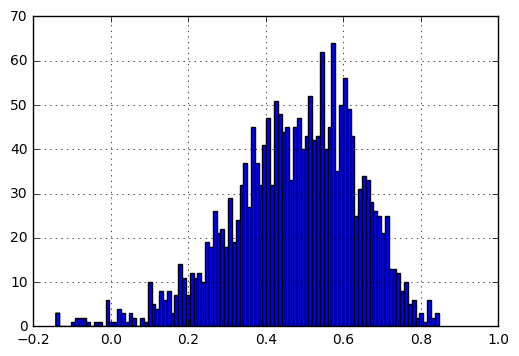

In [2]:
num_replications = 2000
bcorrs = []
for rep in range(num_replications): 
    bootstrap = df.sample(n=df.shape[0], replace=True, random_state=rep)
    bcorrs.append(bootstrap.corr().loc['m']['v'])

bcorrs = pd.Series(bcorrs)
bcorrs.hist(bins = 100)

In [3]:
print('Percentile Method = ({}, {})'.format(bcorrs.quantile(0.025), bcorrs.quantile(0.975)))

Percentile Method = (0.11272298960481524, 0.7442993194563169)


## Calculate p0, z0 and invert G

### P0

In [4]:
p0 = len(bcorrs[bcorrs<=theta_hat])/len(bcorrs)
p0

0.521

### Z0

In [5]:
from scipy.stats import norm
z0 = norm.ppf(p0)
z0

0.05266352689406844

## Z_alpha

In [6]:
alpha = 0.05/2
z_alpha = norm.ppf(alpha)
z_alpha

-1.9599639845400545

## Not BC_a?

In [7]:
bc_a = bcorrs.quantile(norm.cdf(2*z0 + z_alpha))
bc_a

0.13505952182754302